In [107]:
# Import the pandas library for df creation
import pandas as pd

# Import the NumPy library to use the random package
import numpy as np

# Import the matplotlib library, package pyplot for plotting
import matplotlib.pyplot as plt

# Use magic function to render the figure in a notebook
%matplotlib inline

# Import the seaborn library for plotting
import seaborn as sns

# supresses future seaborn warnings
import warnings                                                 
warnings.simplefilter(action='ignore', category=FutureWarning)

# Sets Generator type with a declared value of 100
rng = np.random.default_rng(100)

# Set number of samples based on number of births
n = 63739

## Introduction


The project requires us to simulate a real-world phenomenon of our choosing.
We have been asked to model and synthesis data related to this phenomenon using Python, in particular the numpy.random library. The output of the project should be a synthesized data set.

I will be examining the rate of breastfeeding initiation in Ireland.  I will create a dataset of variables associated with breastfeeding. I will simulate the distribution of breastfeeding initiation in a random sample of an identified segment of the population. I will explore the relationships, if any, between these factors and how they may influence the rate of breastfeeding initiation.

This will include:
1.	The distribution of breastfeeding initiation in an identified segment of the population
2.	The factors contributing to breastfeeding initiation
3.	How these factors are distributed in the identified segment of the population

This topic is of particular interest to me as I have been successfully breastfeeding my own daughter for the past year. The publication of the NIPRS 2019 report received widespread new coverage and highlighted the low rates of breastfeeding in Ireland. On reflection I was unable to identify how I had arrived at the decision to breastfeed. I began to read more on the topic including how rates in Ireland compare to international rates and the socio-cultural change sin breastfeeding. From this the initial influencing factors on breastfeeding initiation outlined above were identified. While I meet some of the criteria, I do not meet all. And yet as a mother in Ireland exclusively breastfeeding for over 12 months, I am one of only 7%. This intrigued me and I wanted to examine what factors known and unknown tome may have influenced my decision and breastfeeding journey. 

### Breastfeeding 

#### What is breastfeeding?
Breastfeeding, or nursing, is the process of providing an infant with their mother’s breastmilk (WHO). This is usually done directly from the breast but can also be provided indirectly using expressed breast milk (Ibid.). 
Breastfeeding is important as it offers numerous health benefits for both mother and infant:
Benefits to infant:
* Breast milk is naturally designed to meet the calorific and nutritional needs of an infant (WHO) and adapts to meet the needs of the infant as they change (NHS)
* Breast milk provides natural antibodies that help to protect against common infections and diseases (WHO, NHS)
* Breastfeeding is associated with better long-term health and wellbeing outcomes including less likelihood developing asthma or obesity and higher income in adult life (WHO)

Benefits to mother: 
* Breastfeeding lowers the mother’s risk of breast and ovarian cancer, osteoporosis, cardiovascular disease, and obesity (NHS). 
* Breastfeeding is associated with lower rates of post-natal depression and fewer depressive symptoms for women who do develop post-natal depression while breastfeeding (Borra, Dennis).  
* Breastfeeding is a cost effective, safe and hygienic method of infant feeding (WHO). 

The World Health Organisation, and numerous other organizations (AAP, NHS, HSE) recommend exclusively breastfeeding for the first 6 months of an infant’s life and breastfeeding supplemented by other foods from 6 months on. 
However, globally nearly 2 out of 3 infants are not exclusively breastfed for the first 6 months (WHO). “The breastfeeding initiation rate of 63.8% in maternity hospitals in Ireland is among the lowest in the world, compared to rates of 90% in Australia, 81% in the UK and 79% in the USA (HSE, 2016; NHS, 2011; PHAA, 2010, CDC, 2014). (IMIS 2019).
“The WHO Global Targets to improve maternal, infant and young child nutrition include the target of an increase, by 2025, to a rate of at least 50% exclusive breastfeeding in the first six months. According to WHO World Health Statistics 2013, 15% of children in Ireland are exclusively breastfed for the first six months compared with the global average of 38% and WHO European average of 25% (WHO, 2013).

“Despite gradual increases over the last ten years, Ireland’s breastfeeding rates continue to be the lowest in international comparisons (Victora et al. 2016; EuroPeriStat, 2013) with implications for maternal and child health. Most recently published NPRS data reports 56.9% any breastfeeding on discharge from maternity services, 46.3% exclusive breastfeeding (HSE, 2016). Breastfeeding initiation rates in Ireland are currently among the lowest in the world, compared to initiation rates of 90% in Australia, 81% in the UK and 79% in the USA (HSE, 2016; NHS, 2011; PHAA, 2010, CDC, 2014). Breastfeeding rates strongly correlate to maternal education and social class. The Growing up in Ireland study found that 79% of mothers who breastfed had a third-level degree breastfed compared to 29% who left school at Junior Certificate level (Williams et al, 2010). (HSE).





| Variable Name            | Description        | Data Type | Distribution      |
|--------------------------|--------------------|-----------|-------------------|
| Age                      |                    | Numeric   | Normal/Triangular |
| Civil Status             |                    | Boolean   |                   |
| Private Health Insurance |                    | Boolean   |                   |
| Breastfeeding Initiation | Dependent Variable | Boolean   |                   |

### Age

A review of data provided by the NPRS study is used here to determine how maternal age is distributed across the population - mothers with live births in 2016 (http://www.hpo.ie/latest_hipe_nprs_reports/NPRS_2017/Perinatal_Statistics_Report_2017.pdf).

While age is a numerical value it is presented by NPRS as a categorical variable/discrete groups, ranging from under 20 years of age to 45 years of age and older. The NPRS study provides the frequency and percentages of births within each group.

In [93]:
# Downloaded NPRS_Age.csv from CITE
data = pd.read_csv("Data/Age_and_Feeding_Type.csv", index_col='Age Group')

# Other source: https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe

# https://www.w3resource.com/pandas/dataframe/dataframe-t.php
data = data.T
data = data.iloc[0:4, 0:8]

data

Age Group,Under 20 Years,20-24 Years,25-29 Years,30-34 Years,35-39 Years,40-44 Years,45 Years and Over,Total
Artificial,786,3158,5409,8284,6458,1380,94,25569
Breast,250,1632,4883,12193,10266,2173,144,31541
Combined,66,388,1099,2470,2004,548,54,6629
Total,1102,5178,11391,22947,18728,4101,292,63739


In [108]:
age = pd.read_csv("Data/Age_and_Feeding_Type.csv")
age = age.iloc[0:7, 0:8]
age['pct']=age['Breast']/sum(age['Breast'])*100  

age

,Age Group,Artificial,Breast,Combined,Total,pct
0,Under 20 Years,786,250,66,1102,0.792619
1,20-24 Years,3158,1632,388,5178,5.174218
2,25-29 Years,5409,4883,1099,11391,15.481437
3,30-34 Years,8284,12193,2470,22947,38.657620
4,35-39 Years,6458,10266,2004,18728,32.548112
5,40-44 Years,1380,2173,548,4101,6.889445
6,45 Years and Over,94,144,54,292,0.456549


An initial view of the NPRS data indicates that the data is somewhat normally distributed with births increasing in the 25 - 29 age group, peaking at 30 - 34 years of age and beginning to decline in the 35 - 39 age set.

Visualising the data set supports this analysis.
It shows a minimum value of less than 20 years of age increasing in a positive direction until it significant peak around 32 years of age - the midpoint of the age group with the greatest frequency of births. 

This can be replicated using a Trinangualr Distribution. This generates a random number from a weighted range by distribuing events between the maximum and minimum values provided, based on a third value that indicates what the most likely outcome will be.[54] Here we are looking for 100 events (births) distributed between the ages of 16 and 50 with a known peak where the mothers age is 32.

In [124]:
# age_distribution() takes no argument but it generates a random number in [|1, 100|] 
# and using percentages from the table above generates a random value in the associated population
def age_distribution():
        y = random.randint(1,100)
        if y <= 23:
                return random.randint(15,19)
        elif 23 < y <= 43:
                return random.randint(20,24)
        elif 43 < y <= 62:
                return random.randint(25,29)
        elif 62 < y <= 77:
                return random.randint(30,34)
        elif 77 < y <= 88:
                return random.randint(35,39)
        elif 88 < y <= 95:
                return random.randint(40,44)
        else:
                return random.randint(45,49)

Here is your triangular continuous random variable:
 [31 44 24 32 28 33 40 31 29 27 26 33 23 28 27 38 36 44 39 32 36 27 34 34
 45 35 38 35 41 34 25 37 43 29 46 31 24 29 26 28 32 28 23 28 34 37 42 37
 29 38 32 31 25 30 31 27 32 33 20 35 41 34 32 28 48 30 41 29 30 26 30 31
 28 35 23 30 25 35 36 35 28 23 39 22 31 25 30 30 42 34 32 43 44 45 20 42
 30 34 31 31]


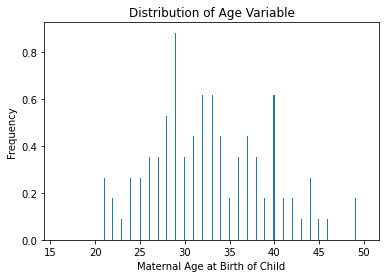

In [3]:
# Here we are looking for a random array with a lower limit of 16 an upper limit of 50
# and 32 being the number that appears most frequently (the mid point of the most frequent age group)
# over n number of instances where n is the total number of births
# and for the out to be presented on a Triangular Distribution plot

Tri_var = np.random.triangular(left = 20, mode = 30, right = 50, size = 100).astype(int)
print ("Here is your triangular continuous random variable:\n % s" % (Tri_var)) # [55]

#  https://stackoverflow.com/questions/60870070/a-weighted-version-of-random-randint
plt.hist(np.ma.round(np.random.triangular(left = 20, mode = 30, right = 50, size = 100)).astype(int),
        range = (16, 50), bins = 300, density = True)

plt.title('Distribution of Age Variable')
plt.xlabel('Maternal Age at Birth of Child')
plt.ylabel('Frequency')
plt.show()

### Civil Status

Univariate analysis by Gallagher shows that maternal marital status at the time of birth is significantly associated with breastfeeding initiation (Gallagher L, Begley C, Clarke M, Determinants of breastfeeding initiation in Ireland., Irish journal of medical science, 185, 3, 2015, 663 - 668).

Data captured in the 2016 NPRS survey does not capture relational data between breastfeeding initiation and maternal marital status at the time of birth (http://www.hpo.ie/latest_hipe_nprs_reports/NPRS_2016/Perinatal_Statistics_Report_2016.pdf). However it does provide percentage values for maternal marital status across all age groups:

| Maternal Civil Status at birth | Percentage of Total births |
|--------------------------------|----------------------------|
| Married                        | 62.2                       |
| Single                         | 36.4                       |
| Other                          | 1.4                        |


CSO data on civil status for 2016 does record information across all age groups (https://www.cso.ie/en/releasesandpublications/er/mcp/marriagesandcivilpartnerships2016/). However, as it only captures data for 
* Marriages
* Civil parnerships
* Divorces, Judicial Separation and Nullity applications received by the courts 
* Divorces, Judicial Separation and Nullity applications granted by the courts 

It does not capture other civil arrangements such as informal seperations or and co-habitants.

For the purposes of this simulation the NPRS data will be used.

This is a categorical variable that has 3 possible values
1. Married
2. Single
3. Other (encompassing all other civil statuses as indentified by the survey respondant)

In [4]:
# Classifying Martial Status
# 'single' if single, 'married' if married and 'other' for all other categories
civil_status = ['single', 'married', 'other']

# 
civil_status = rng.choice(civil_status, n, p=[0.22, 0.72, 0.06])

# https://stackoverflow.com/questions/42916330/efficiently-count-zero-elements-in-numpy-array/42916378
print("Single: ", np.count_nonzero(civil_status == 'single'))
print("Married: ", np.count_nonzero(civil_status == 'married'))
print("Other: ", np.count_nonzero(civil_status == 'other'))

Single:  14056
Married:  45799
Other:  3884


### Insurance

In [5]:
# Downloaded NPRS_Age.csv from CITE
data = pd.read_csv("Data/Insurance_by_Age.csv")
data

,Age,Total number,Percentage Insured
0,Under 20,1102,10
1,20 - 24 Years,5178,9
2,25 - 29 Years,11391,9
3,30 - 34 Years,22947,14
4,35 - 39 Years,18728,19
5,40 - 45 Years,4101,19
6,45 years and Over,292,20


## Generate Data Set

In [6]:
# the number of rows
rows = 500

### Age

In [7]:
# intialise data of lists.
data = {'Age Group':['Under 20', '20-24 Years', '25-29 Years', '30-34 Years',
                    '35-39 Years', '40-44 Years', '45 Years and Over'],
        'Age':[]}
 
# Create DataFrame with single column for Age
age_dist = pd.DataFrame((np.random.triangular(left = 16, mode = 30, right = 50, size = 500)).astype(int), columns=['Maternal age at birth'])
 
# Print the output.
print(age_dist)

     Maternal age at birth
0                       30
1                       28
2                       27
3                       40
4                       34
..                     ...
495                     25
496                     41
497                     24
498                     33
499                     33

[500 rows x 1 columns]


In [8]:
# Classifying Martial Status
# 'single' if single, 'married' if married and 'other' for all other categories
civil_status = ['single', 'married', 'other']
sim_status = rng.choice(civil_status, 500, p=[0.05, 0.39, 0.56])
civstat_dist = pd.DataFrame(sim_status, columns = ['Civil Status'])

# Print the output.
print(civstat_dist)

    Civil Status
0          other
1          other
2         single
3          other
4         single
..           ...
495        other
496       single
497        other
498        other
499        other

[500 rows x 1 columns]


In [19]:
# https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi

df = pd.DataFrame.from_records([{'Age': age_dist, 'Civil Status': civstat_dist}], index=[1]),

df

(                                                 Age  \
 1       Maternal age at birth
 0                  ...   
 
                                         Civil Status  
 1      Civil Status
 0          other
 1          o...  ,)

### Insurance

In [ ]:
age_insurance = {range(15,20) : 10,
                 range(20,25) : 9,
                 range(25,30) : 9,
                 range(30,35) : 14,
                 range(35,40) : 19,
                 range(40,45) : 19,
                 range(45,50) : 20}